In [41]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets

import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

from IPython.display import Image  

import seaborn as sns

import numpy as np

import scipy

import sys

from io import StringIO

from graphviz import Source

import pydot

from IPython.display import Image

from subprocess import call

import xgboost as xgb

import matplotlib.pyplot as plt

# Résumé du dataset

In [42]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.head())
x = df.values

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## Dimensions

In [43]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)
print(dataset.shape)

(150, 5)


On observe que l'on a 150 isntances et 5 attributs

## Pics des données

In [44]:
dataset.head(20)

sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3          3.0           1.1          0.1  Iris-setosa
14           5.8          4.0           1.2          0.2  Iris-setosa
15           5.7          4.4           1.5          0.4  Iris-setosa
16           5.4          3.9           1.3          0.4  Iris-setosa
17           5.1          3.5           1.4          0.3  Iris-setosa
18           5.7          3.8           1.7          0.3  Iris-setosa
19           5.1          3.8           1.5          0.3  Iris-setosa

Ici on ne montre que les vingt premières lignes

## Résumé statistique

In [45]:
dataset.describe()

sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Observations des similarités dans les valeurs propres à chaque attributs ainsi qu'au niveau de leur range.

## Distribution des classes

On peut voir que chaque classe à le même nombre d'instances (50 instances ce qui équivaut à 33% de la dataset)

In [46]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Visualisation des données 

## Plot univarié : distribution des données

### Boxplot

In [47]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

### Histogramme

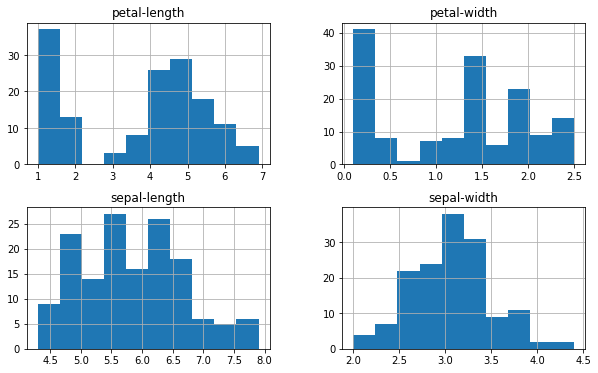

In [48]:
# histograms
dataset.hist()
pyplot.show()

## Autres

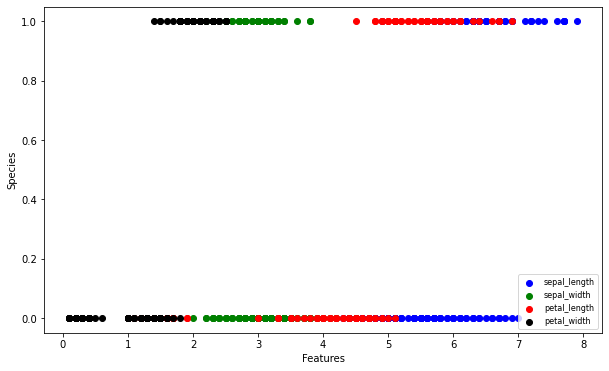

In [49]:
# Plot the relation of each feature with each species
plt.xlabel('Features')
plt.ylabel('Species')

pltX = dataset.iloc[:, 0]
pltY = y
plt.scatter(pltX, pltY, color='blue', label='sepal_length')

pltX = dataset.iloc[:, 1]
pltY = y
plt.scatter(pltX, pltY, color='green', label='sepal_width')

pltX = dataset.iloc[:, 2]
pltY = y
plt.scatter(pltX, pltY, color='red', label='petal_length')

pltX = dataset.iloc[:, 3]
pltY = y
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})
plt.show()

## Plot multivariés : relation entre les variables d'entrées

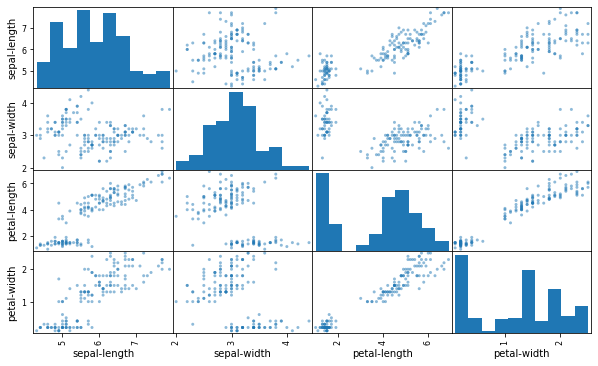

In [50]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

On observe quelques diagonales qui poussent à émettre l'hypothèse d'une forte corrélation et d'une relation prédictive.

## Observation des cibles référencées

In [51]:
y = data.target
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Création d'un dataset de validation

In [52]:
array = dataset.values
X = array[:,0:4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

80% set d'entrainement et 20% set de validation

In [53]:
def show_data(y_test,X,y):
    ##There are 3 classes
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y_test))])
    for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   c=cmap(idx), marker=markers[idx], label=cl)
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


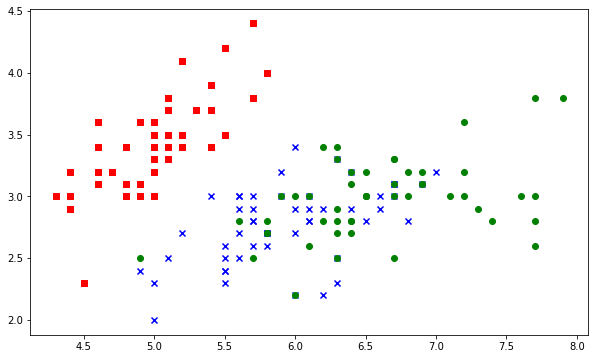

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
show_data(y_test,x,y)

## Test Harness

Utilisation d'une validation croisée stratifiée de 10 fois pour estimer la précision du modèle. Cela divisera notre ensemble de données en 10 parties, s'entraînera sur 9 et testera sur 1 et répétera pour toutes les combinaisons de divisions de test de train.

Stratifiée signifie que chaque pli ou division de l'ensemble de données visera à avoir la même distribution d'exemple par classe que celle existant dans l'ensemble de données de formation. 

Nous définissons la graine aléatoire via l'argument random_state sur un nombre fixe pour garantir que chaque algorithme est évalué sur les mêmes divisions de l'ensemble de données d'apprentissage. La graine aléatoire spécifique n'a pas d'importance.

Nous utilisons la métrique de «précision» pour évaluer les modèles.

Il s'agit d'un rapport entre le nombre d'instances correctement prédites divisé par le nombre total d'instances dans l'ensemble de données multiplié par 100 pour donner un pourcentage (par exemple, 95% de précision). Nous utiliserons la variable de score lors de l'exécution de la construction et de l'évaluation de chaque modèle.



## Création du modèle

Nous ne savons pas quels algorithmes seraient efficaces sur ce problème ni quelles configurations utiliser.

Les graphiques nous donnent une idée que certaines classes sont partiellement linéairement séparables dans certaines dimensions, nous nous attendons donc à de bons résultats en général.

Testons 6 algorithmes différents:

   Régression logistique (LR)
    Analyse discriminante linéaire (LDA)
    K-voisins les plus proches (KNN).
    Arbres de classification et de régression (CART).
    Gaussian Naive Bayes (NB).
    Prise en charge des machines vectorielles (SVM).

Il s'agit d'un bon mélange d'algorithmes simples linéaires (LR et LDA), non linéaires (KNN, CART, NB et SVM).

In [55]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.038188)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


Dans ce cas, nous pouvons voir qu'il semble que les machines à vecteurs de support (SVM) ont le plus grand score de précision estimé à environ 0,98 ou 98%.

Nous pouvons également créer un tracé des résultats de l'évaluation du modèle et comparer la dispersion et la précision moyenne de chaque modèle. Il existe une population de mesures de précision pour chaque algorithme car chaque algorithme a été évalué 10 fois (via une validation croisée 10).

Un moyen utile de comparer les échantillons de résultats pour chaque algorithme consiste à créer un diagramme à boîte et à moustaches pour chaque distribution et à comparer les distributions.

In [56]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

Nous pouvons voir que les tracés de boîte et de moustaches sont écrasés en haut de la plage, avec de nombreuses évaluations atteignant une précision de 100%, et certaines poussant vers le bas dans les précisions élevées de 80%.
Boîte et tracé de moustache comparant des algorithmes d'apprentissage automatique sur l'ensemble de données Iris Flowers.

# Random Forest

In [57]:
model = RandomForestClassifier(n_estimators=100)


# Faire une prédiction

Nous devons choisir un algorithme à utiliser pour faire des prédictions.

Les résultats de la section précédente suggèrent que le SVM était peut-être le modèle le plus précis. Nous utiliserons ce modèle comme modèle final.

Maintenant, nous voulons avoir une idée de la précision du modèle sur notre ensemble de validation.

Cela nous donnera une vérification finale indépendante de l'exactitude du meilleur modèle. Il est important de conserver un ensemble de validation au cas où vous auriez fait une erreur pendant la formation, comme un surapprentissage sur l'ensemble de formation ou une fuite de données. Ces deux problèmes se traduiront par un résultat trop optimiste.

## Faire une prédiction

Nous pouvons ajuster le modèle sur l'ensemble de données de formation et faire des prédictions sur l'ensemble de données de validation.

In [58]:
# Make predictions on validation dataset
model_1 = SVC(gamma='auto')
model_1.fit(X_train, Y_train)
predictions = model_1.predict(X_validation)

Vous pouvez également faire des prédictions pour des lignes de données uniques. Pour des exemples sur la façon de procéder, consultez le didacticiel:

   Comment faire des prédictions avec scikit-learn

Vous pouvez également enregistrer le modèle dans un fichier et le charger plus tard pour faire des prédictions sur les nouvelles données. 

In [59]:
model.fit(x_train, y_train)

feature_imp = pd.Series(model.feature_importances_,index=data.feature_names).sort_values(ascending=False)
feature_imp

%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

No handles with labels found to put in legend.


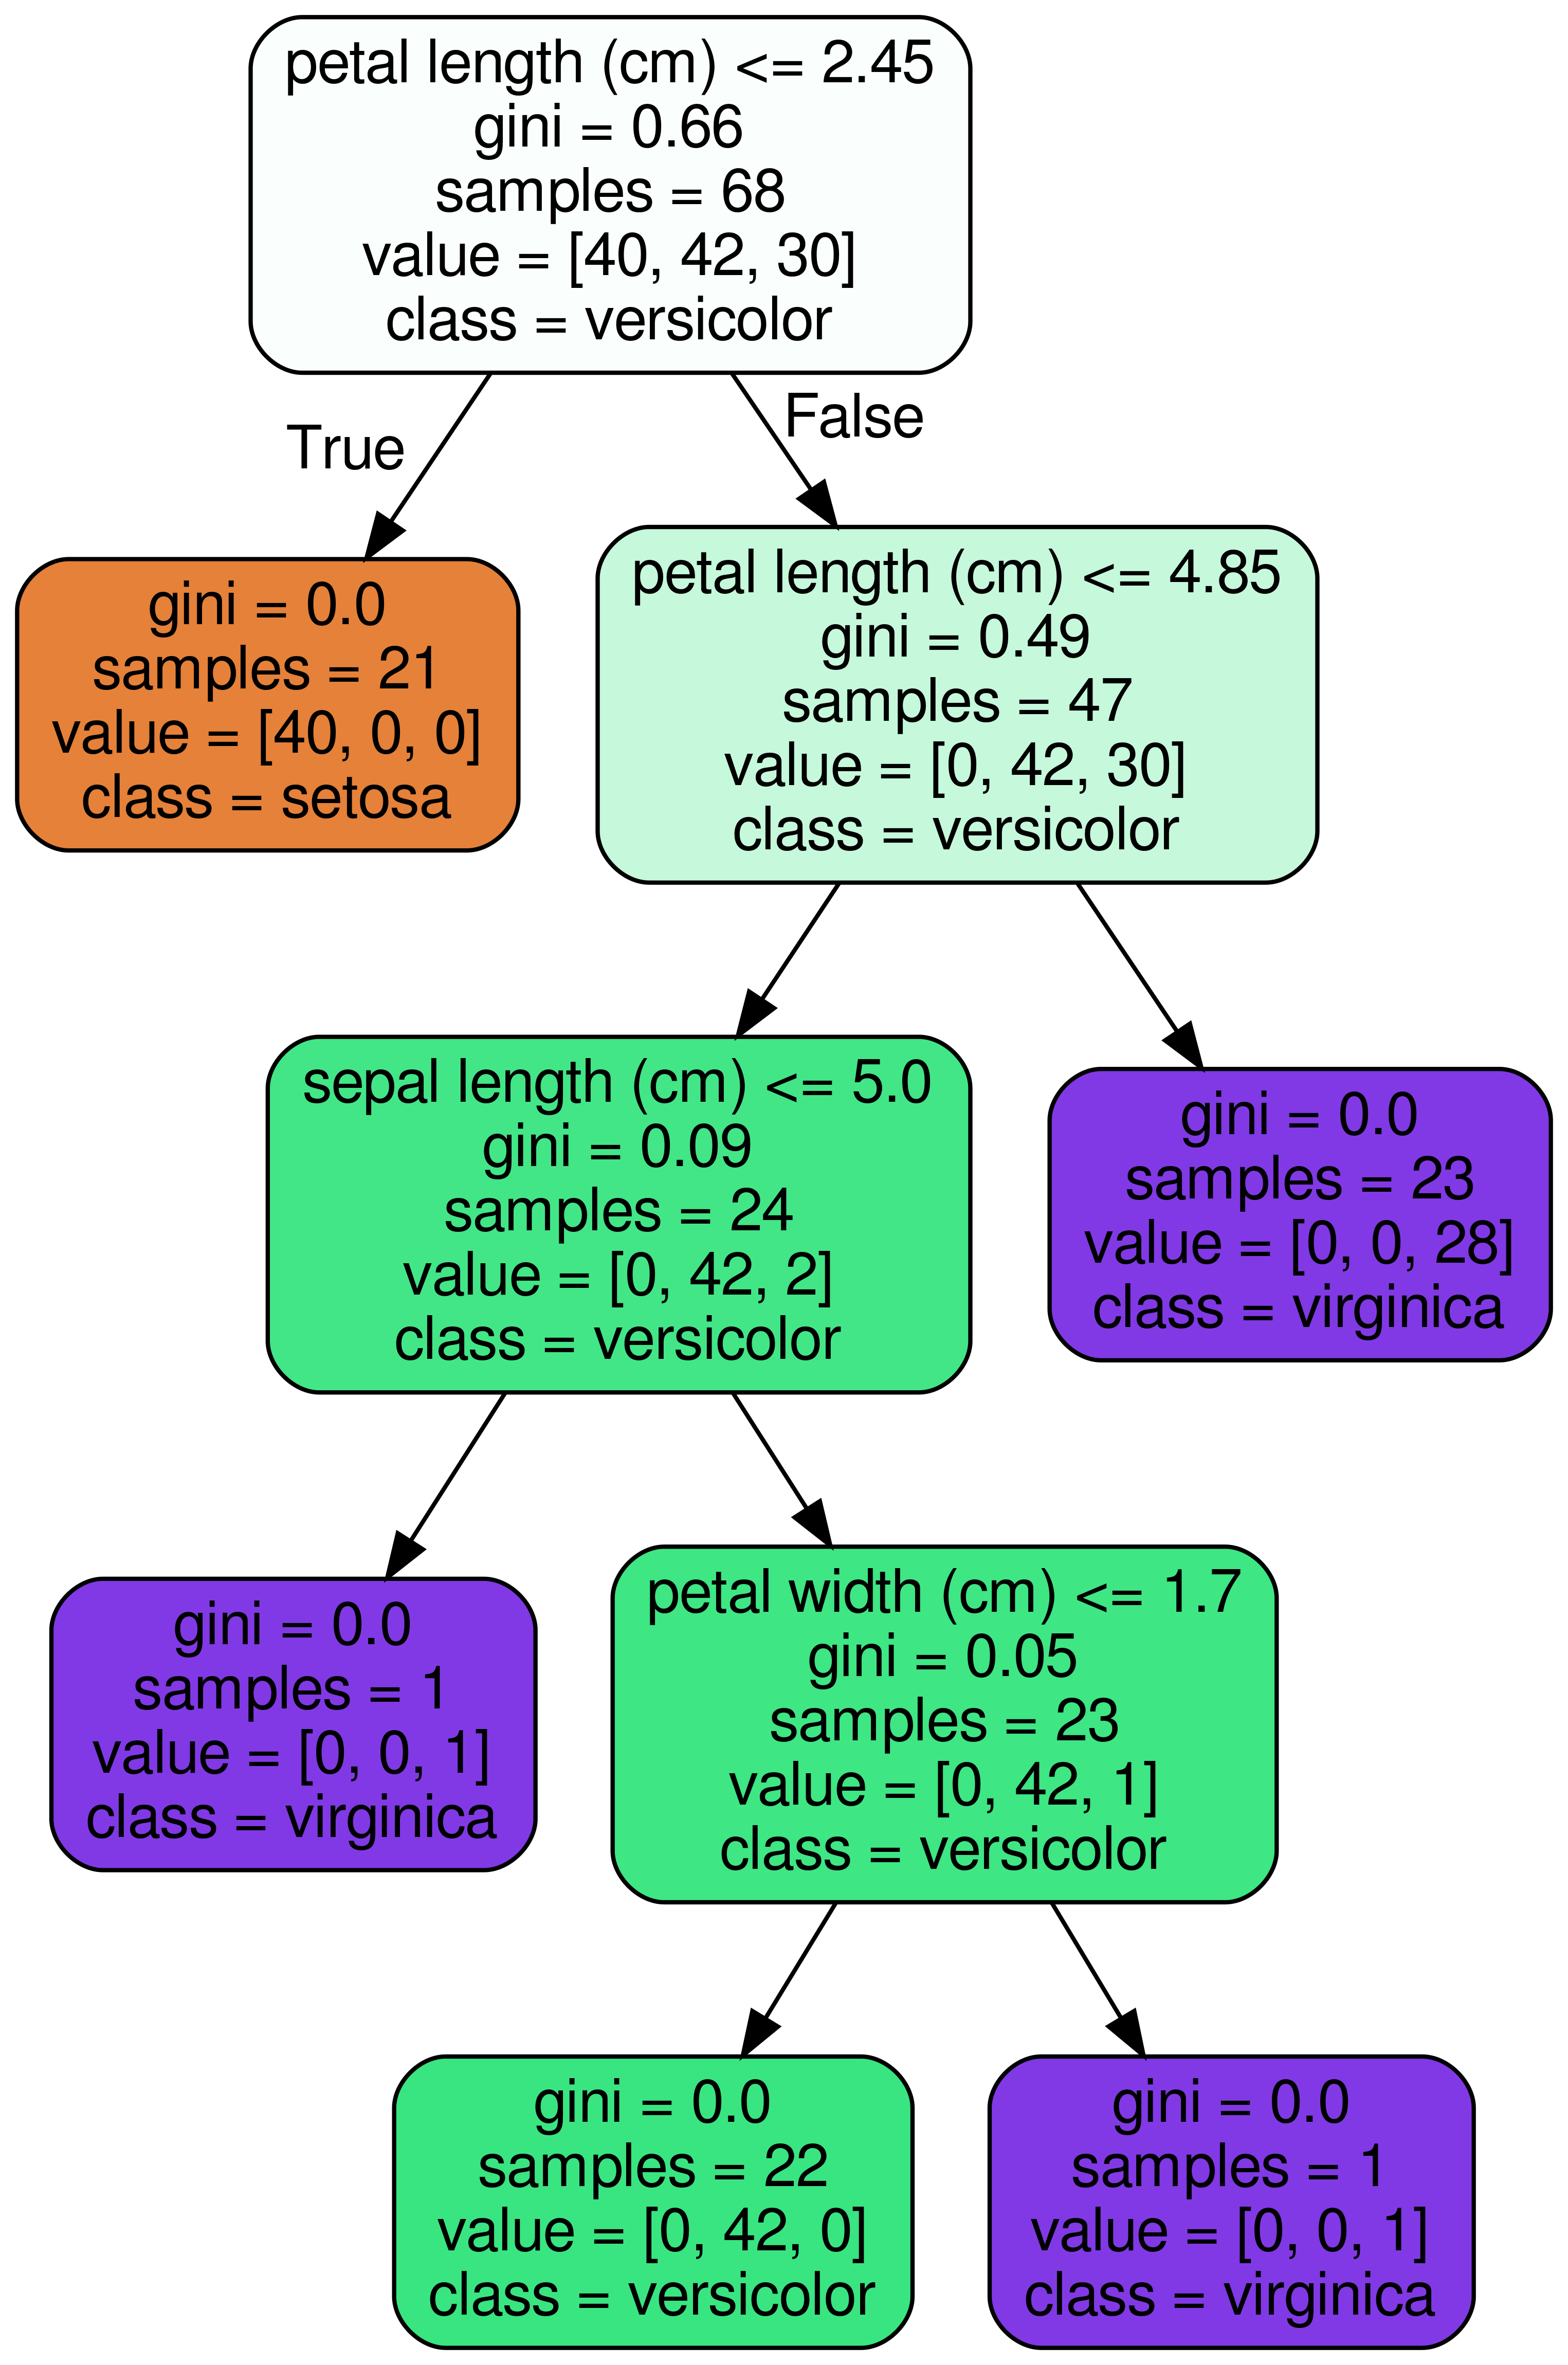

In [60]:
# Extract single tree
estimator = model.estimators_[5]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = data.feature_names,
                class_names = data.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
Image(filename = 'tree.png')

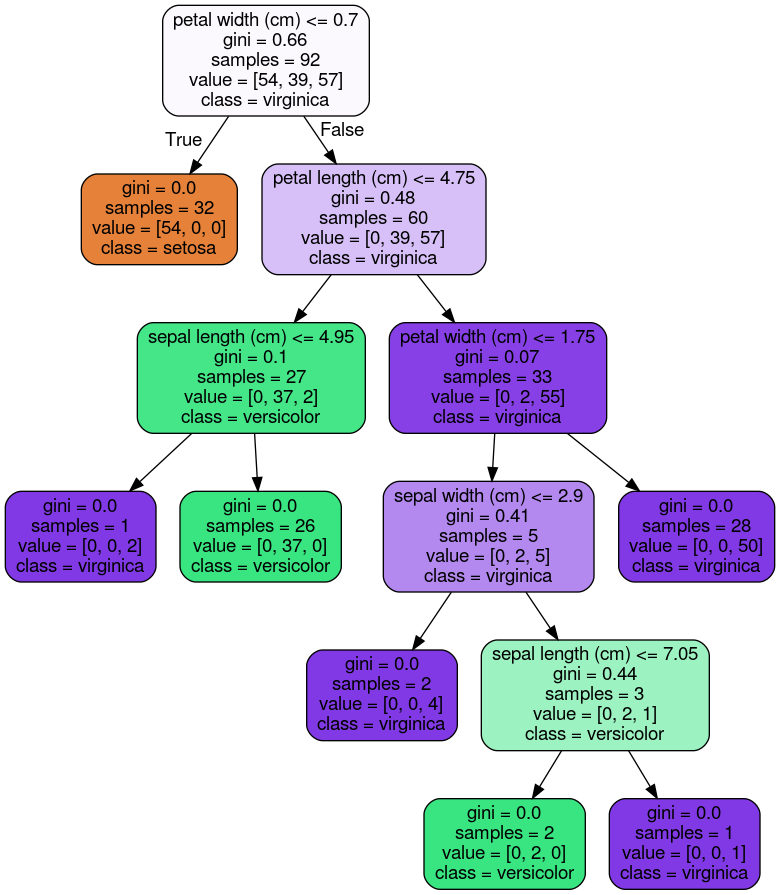

In [61]:
# Train
model_2 = model
model_2.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

graph = Source(export_graphviz(estimator, out_file=None, 
                               feature_names=iris.feature_names, class_names = iris.target_names,
                              rounded = True, proportion = False, precision = 2, filled = True))
graph.format = 'png'
graph.render('dtree_render',view=True)

Image(filename = 'dtree_render.png')

## Evaluation des prédictions

Nous pouvons évaluer les prédictions en les comparant aux résultats attendus dans l'ensemble de validation, puis calculer la précision de la classification, ainsi qu'une matrice de confusion et un rapport de classification.

In [62]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Nous pouvons voir que la précision est de 0,966 ou environ 96% sur l'ensemble de données Hold Out.

La matrice de confusion fournit une indication des trois erreurs commises.

Enfin, le rapport de classification fournit une ventilation de chaque classe par précision, rappel, score f1 et support montrant d'excellents résultats (étant donné que l'ensemble de données de validation était petit).

Iris classification
[[11  0  0]
 [ 0 17  0]
 [ 0  0 10]]


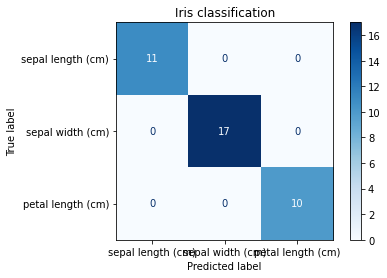

In [63]:
disp = metrics.plot_confusion_matrix(model,
                                     x_test, y_test,
                                     display_labels=data.feature_names,
                                     cmap=plt.cm.Blues,
                                     normalize=None)
title = "Iris classification"
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

# KNeighbors

In [64]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

y_pred = knn.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 10]])

In [65]:
knn.score(x_test, y_test)

0.9736842105263158

In [66]:
def citation():
        
    %pylab inline
    pylab.rcParams['figure.figsize'] = (10, 6)

    iris = datasets.load_iris()

    # We'll use the petal length and width only for this analysis
    X = iris.data[:, [2, 3]]
    y = iris.target

    # Place the iris data into a pandas dataframe
    iris_df = pd.DataFrame(iris.data[:, [2, 3]], columns=iris.feature_names[2:])

    # View the first 5 rows of the data
    #print(iris_df.head())

    # Print the unique labels of the dataset
    #print('\n' + 'The unique labels in this data are ' + str(np.unique(y)))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

    #print('There are {} samples in the training set and {} samples in the test set'.format(
    #X_train.shape[0], X_test.shape[0]))
    #print()

    sc = StandardScaler()

    sc.fit(X_train)

    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    #print('After standardizing our features, the first 5 rows of our data now look like this:\n')
    #print(pd.DataFrame(X_train_std, columns=iris_df.columns).head())

    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y_test))])
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   c=cmap(idx), marker=markers[idx], label=cl)
        
    return X_train_std, y_train, X_test_std, y_test


In [67]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

/home/amelie/.local/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title', 'array', 'disp']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matche

Populating the interactive namespace from numpy and matplotlib
The accuracy of the knn classifier is 0.95 out of 1 on training data
The accuracy of the knn classifier is 1.00 out of 1 on test data


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


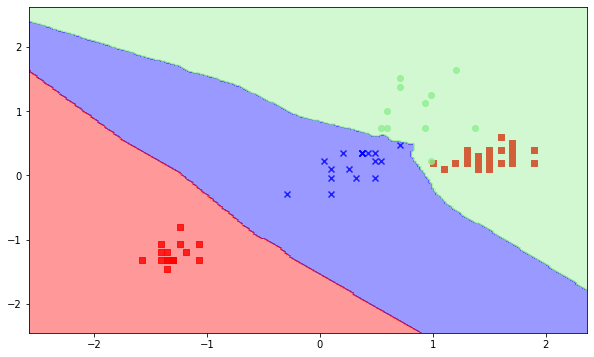

In [68]:
X_train_std, y_train, X_test_std, y_test = citation()

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train_std, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test_std, y_test)))

plot_decision_regions(X_test_std, y_test, knn)

# Régression linéaire

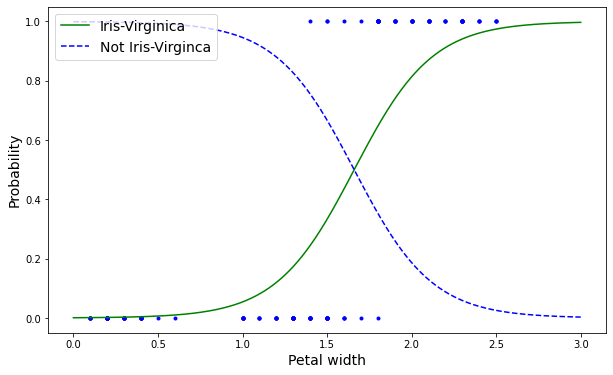

In [69]:
iris1 = datasets.load_iris()
X = iris1["data"][:,3:]  # petal width
y = (iris1["target"]==2).astype(np.int)

log_reg = LogisticRegression(penalty="l2")
log_reg.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()


# LinearDiscriminantAnalysis

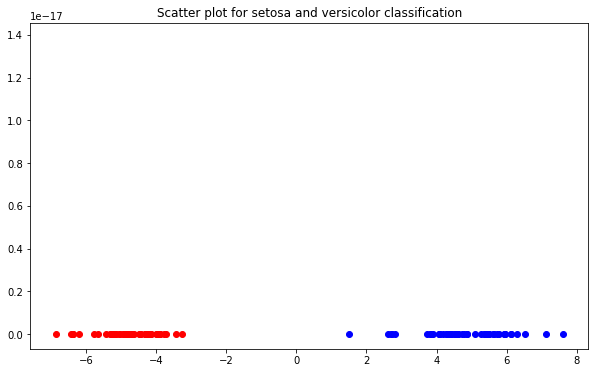

Threshold for setosa and versicolor classification: -4.805763011979293


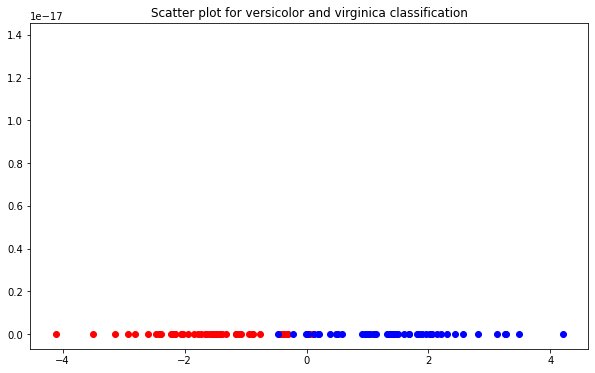

Threshold for versicolor and virginica classification: -1.5104177907815


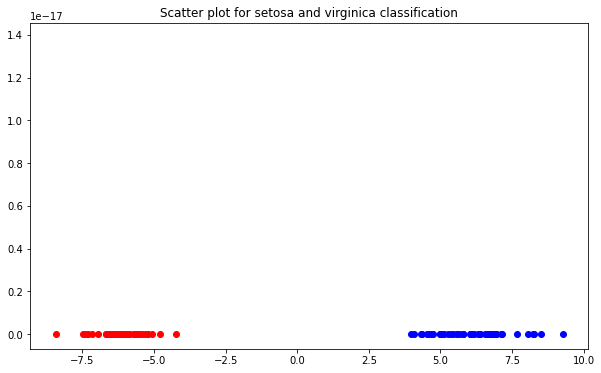

Threshold for setosa and virginica classification: -6.108499551588142


In [70]:
iris = datasets.load_iris();
setosa_versicolor = iris.data[0:100,0:3]
setosa_versicolor_targets = iris.target[0:100]
versicolor_virginica = iris.data[50:150,0:3]
versicolor_virginica_targets = iris.target[50:150]
setosa_virginica = np.concatenate((iris.data[0:50,0:3], iris.data[100:150,0:3]), axis=0)
setosa_virginica_targets = np.concatenate((iris.target[0:50], iris.target[100:150]), axis=0)
target_names = iris.target_names
t1 = ["setosa","versicolor"]
t2 = ["versicolor","virginica"]
t3 = ["setosa","virginica"]
lda = LDA(n_components=1)

def LDA_result(samples,target):
    return lda.fit(samples,target).transform(samples)

def threshold(LDA_result, targets,index_1, index_2):
    mean_class_1 = LDA_result[targets==index_1,0]
    mean_class_2 = LDA_result[targets==index_2,0]
    result_mean = (np.mean(mean_class_1) + np.mean(mean_class_1))/2
    return result_mean.round(decimals=15)

def scatterPlot(LDA_result,targets,index_1, index_2,text):
    for color, i, target_name in zip(['red', 'blue'], [index_1, index_2], target_names):
        plt.scatter(LDA_result[targets==i,0], np.zeros([50]), color=color,
        label=target_name)
        plt.title("Scatter plot for " + text + " classification")
    plt.show()

lda_result = LDA_result(setosa_versicolor,setosa_versicolor_targets)
scatterPlot(lda_result,setosa_versicolor_targets,0,1,"setosa and versicolor")
t = threshold(LDA_result(setosa_versicolor,setosa_versicolor_targets),setosa_versicolor_targets,0,1)
print("Threshold for setosa and versicolor classification: " + str(t))

lda_result = LDA_result(versicolor_virginica,versicolor_virginica_targets)
scatterPlot(lda_result,versicolor_virginica_targets,1,2,"versicolor and virginica")
t = threshold(LDA_result(versicolor_virginica,versicolor_virginica_targets),versicolor_virginica_targets,1,2)
print("Threshold for versicolor and virginica classification: " + str(t))

lda_result = LDA_result(setosa_virginica,setosa_virginica_targets)
scatterPlot(lda_result,setosa_virginica_targets,0,2,"setosa and virginica")
t = threshold(LDA_result(setosa_virginica,setosa_virginica_targets),setosa_virginica_targets,0,2)
print("Threshold for setosa and virginica classification: " + str(t))

# Gausian Nb

/home/amelie/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/amelie/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


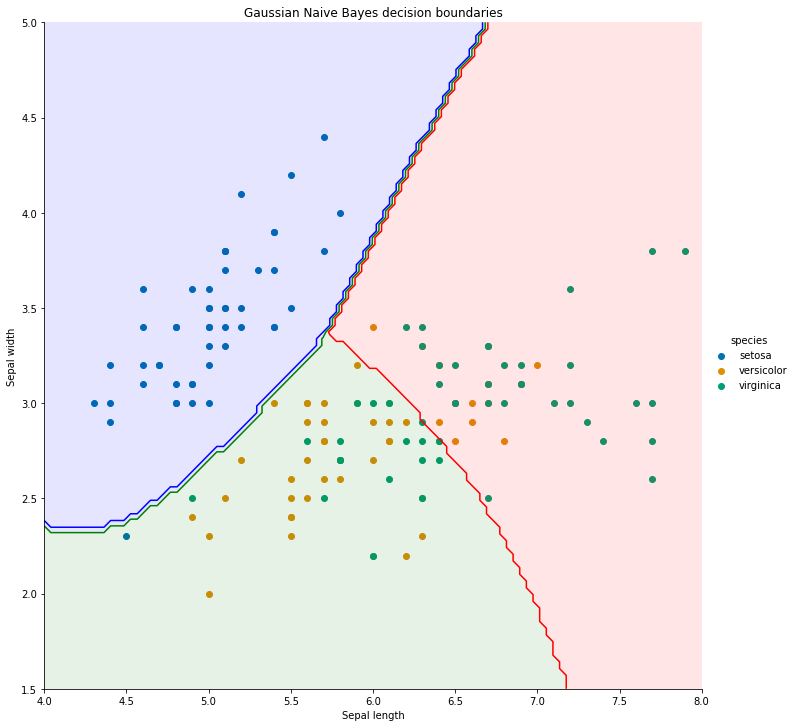

In [71]:
#Load the data set
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})

#Plot the scatter of sepal length vs sepal width
sns.FacetGrid(iris, hue="species", size=7) .map(plt.scatter,"1_sepal_length", "2_sepal_width", )  .add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]


#Setup X and y data
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

#Fit model
model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)


# Our 2-dimensional classifier will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()



# SVC

In [72]:
X_train_std, y_train, X_test_std, y_test = citation()

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train_std, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test_std, y_test)))



plot_decision_regions(X_test_std, y_test, svm)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Populating the interactive namespace from numpy and matplotlib
The accuracy of the svm classifier on training data is 0.95 out of 1
The accuracy of the svm classifier on test data is 0.98 out of 1


# XGBoost classifier.

In [73]:
X_train_std, y_train, X_test_std, y_test = citation()

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train_std, y_train)

print('The accuracy of the xgb classifier is {:.2f} out of 1 on training data'.format(xgb_clf.score(X_train_std, y_train)))
print('The accuracy of the xgb classifier is {:.2f} out of 1 on test data'.format(xgb_clf.score(X_test_std, y_test)))

plot_decision_regions(X_test_std, y_test, xgb_clf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Populating the interactive namespace from numpy and matplotlib
The accuracy of the xgb classifier is 0.99 out of 1 on training data
The accuracy of the xgb classifier is 0.98 out of 1 on test data


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


# Référence

https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

https://medium.com/@randerson112358/python-logistic-regression-program-5e1b32f964db

https://www.kaggle.com/jamesdhope/logistic-regression-for-iris-classification

https://www.kaggle.com/harshamodali/linear-discriminant-analysis-on-iris-dataset

https://xavierbourretsicotte.github.io/Naive_Bayes_Classifier.html

https://www.kaggle.com/mgabrielkerr/visualizing-knn-svm-and-xgboost-on-iris-dataset